In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
shopping_data_path = 'data/Сноз_shopping-data.csv'
shopping_data = pd.read_csv(shopping_data_path)

shopping_data.info(), shopping_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sex                     150 non-null    object
 1   Age                     150 non-null    int64 
 2   Annual Income (k$)      150 non-null    int64 
 3   Spending Score (1-100)  150 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ KB


(None,
       Sex  Age  Annual Income (k$)  Spending Score (1-100)
 0    Male   19                  74                      10
 1  Female   30                  78                      73
 2    Male   63                  48                      51
 3  Female   19                  63                      54
 4    Male   43                  78                      17)

### Завдання 1. 

[6 бали]

Для датасету `<прізвище>_shopping-data.csv`
(Чотири ознаки : sex, age, annual income, spending score)  


1. Побудувати ієрархічну кластеризацію (дендрограму). 
2. За допомогою `AgglomerativeClustering` з `sklearn.cluster` отримати кластеризацію на 5 кластерів.
3. Візуалізувати 5 кластерів на площині (перебираючи попарно ознаки). 
4. Підбором параметрів `affinity` та `linkage` досягти найкращої плоскої візуалізації 5 кластерів для ознак `Age` та `Annual Income`.

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
shopping_data['Sex'] = label_encoder.fit_transform(shopping_data['Sex'])

shopping_data.head()

,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,74,10
1,0,30,78,73
2,1,63,48,51
3,0,19,63,54
4,1,43,78,17


### 1. Побудова ієрархічної кластеризації (дендрограма)

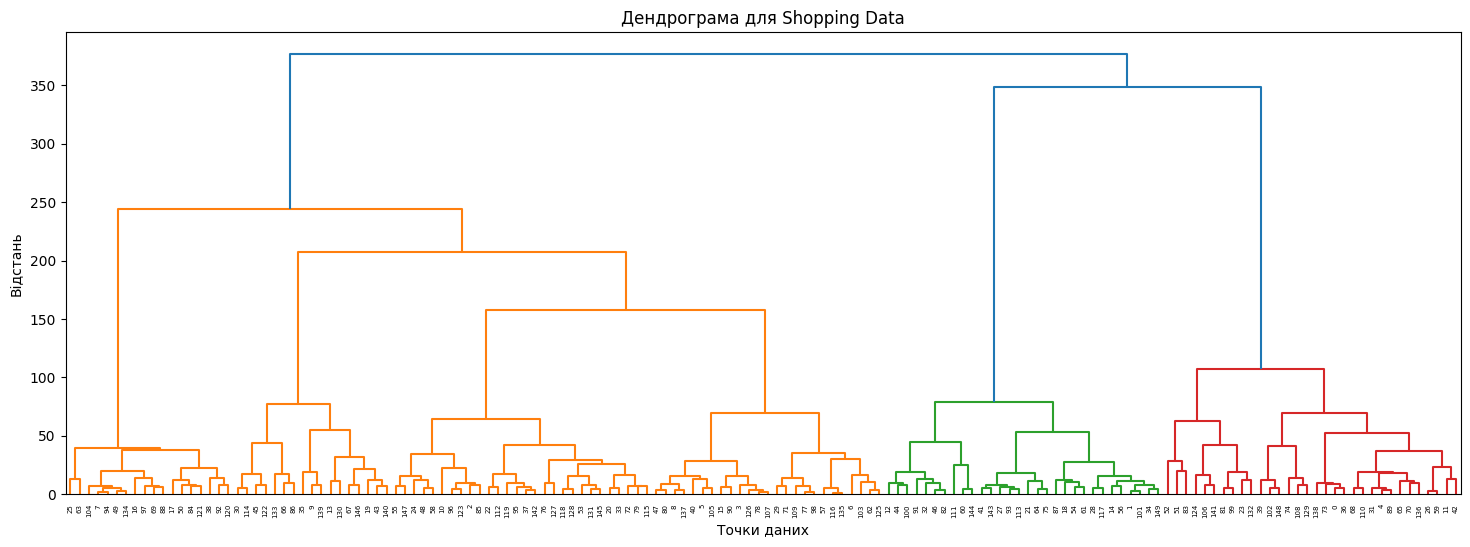

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(shopping_data, method='ward')

plt.figure(figsize=(18, 6))
dendrogram(linked, 
           orientation='top', 
           distance_sort='ascending', 
           show_leaf_counts=True)
plt.title('Дендрограма для Shopping Data')
plt.xlabel('Точки даних')
plt.ylabel('Відстань')
plt.show()

### 2. AgglomerativeClustering з 5 кластерами

In [5]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
shopping_data['Cluster'] = cluster_model.fit_predict(shopping_data)

shopping_data.head()

,Sex,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,74,10,1
1,0,30,78,73,2
2,1,63,48,51,0
3,0,19,63,54,0
4,1,43,78,17,1


### 3. Візуалізація 5 кластерів на площині (перебираючи попарно ознаки)

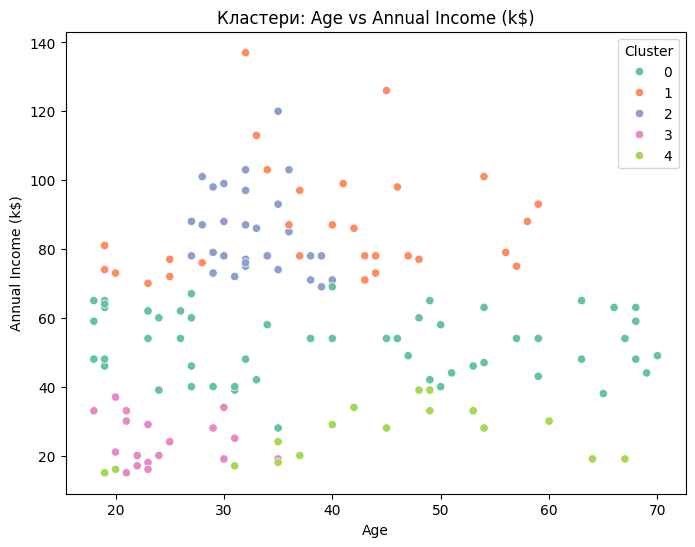

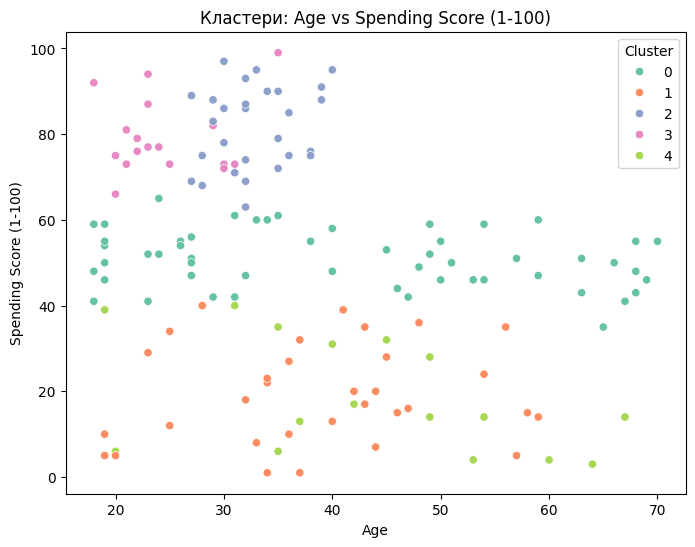

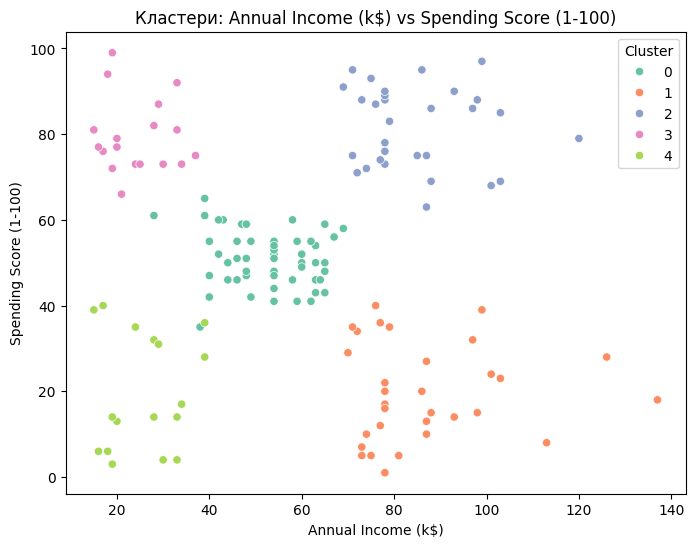

In [6]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=shopping_data, x=features[i], y=features[j], hue='Cluster', palette='Set2')
        plt.title(f'Кластери: {features[i]} vs {features[j]}')
        plt.show()

In [7]:
# Оптимізація параметрів affinity та linkage
affinities = ['euclidean', 'manhattan']
linkages = ['ward', 'complete', 'average', 'single']

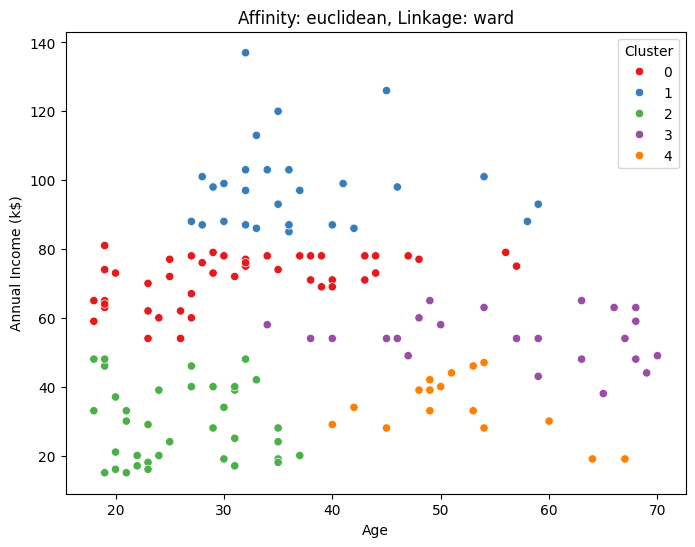

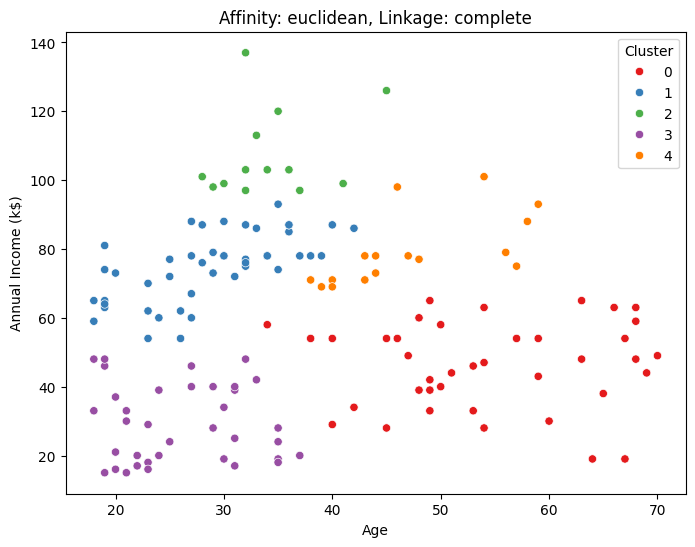

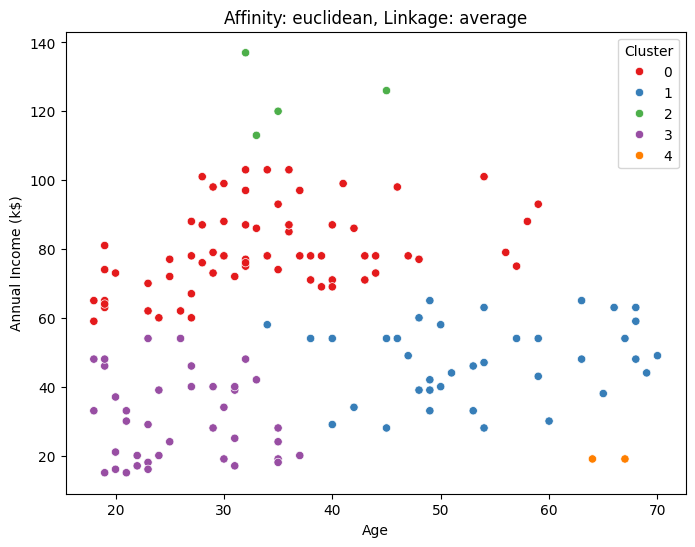

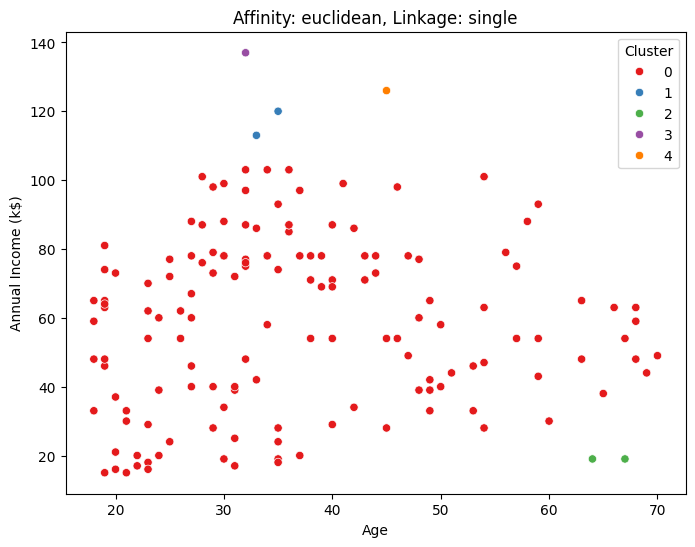

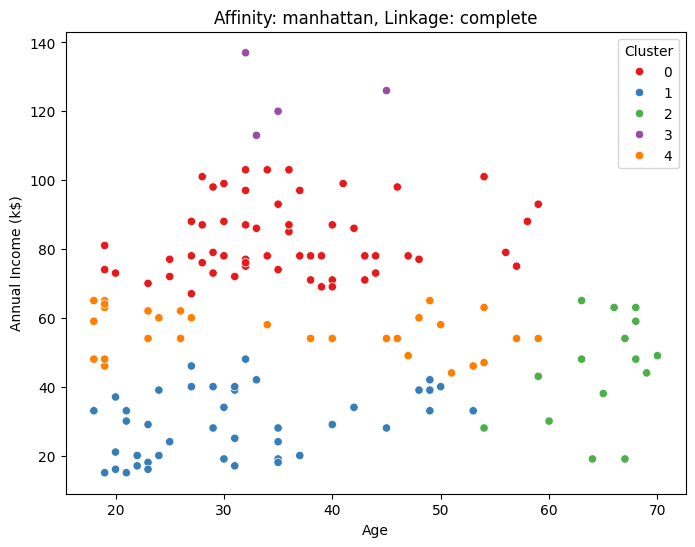

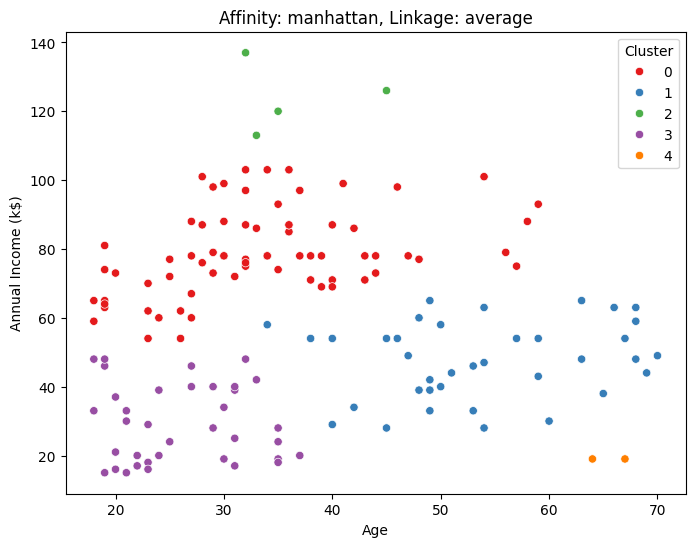

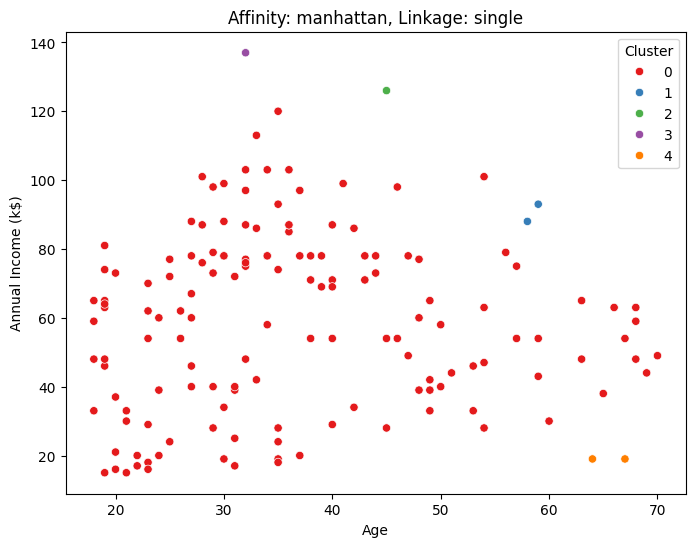

In [8]:
best_affinity, best_linkage = None, None
best_visualization_score = 0  
for affinity in affinities:
    for linkage in linkages:
        # ward можна використовувати тільки з euclidean
        if linkage == 'ward' and affinity != 'euclidean':
            continue
        model = AgglomerativeClustering(n_clusters=5, metric=affinity, linkage=linkage)
        shopping_data['Cluster'] = model.fit_predict(shopping_data[['Age', 'Annual Income (k$)']])

        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=shopping_data, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')
        plt.title(f'Affinity: {affinity}, Linkage: {linkage}')
        plt.show()

## Завдання 2. 

[8 балів] + [прогнози: до 4 балів]

Для датасету `data300_train.csv`
(300 числових ознак, цільова змінна "Category" приймає два значення)

1. За допомогою бегінгу над деревами отримати якомога кращий класифікатор (провести пошук оптимальних параметрів -- глибина дерев, кількість дерев, кількість ознак і т.д.)

2. За допомогою градієнтного бустингу над деревами отримати якомога кращий класифікатор (провести пошук оптимальних параметрів -- темп навчання, глибина дерев, кількість дерев, кількість ознак і т.д.)

3. Зберегти прогнози найкращої моделі на датасеті `data300_test.csv` до файлу `predictions_ens.csv`

4. Вилучивши `"Category"` спробувати отримати кластеризацію на два кластери, що відповідають значенням `"Category"` використовуючи алгоритми K-means та DBSCAN


In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score

In [21]:
data300_train_path = 'data/data300_train.csv'
data300_test_path = 'data/data300_test.csv'

train_data = pd.read_csv(data300_train_path)
test_data = pd.read_csv(data300_test_path)

train_data.info(), train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Columns: 301 entries, x_1 to Category
dtypes: float64(301)
memory usage: 91.9 MB


(None,
     x_1   x_2   x_3   x_4   x_5   x_6   x_7   x_8   x_9  x_10  ...  x_292  \
 0 -0.85  0.12 -0.08  1.17 -0.79  0.56  0.11 -0.06 -0.10 -2.01  ...   0.38   
 1 -0.13  0.22 -0.00 -0.07  0.17  0.78  1.12  0.39 -0.00 -1.17  ...   0.36   
 2 -0.17  0.58  0.01 -0.62  1.13 -0.63 -0.59  0.11  0.02 -0.93  ...   0.77   
 3  0.10  0.84  0.04 -1.20 -0.52  1.97 -0.65 -0.33  0.06  0.22  ...   0.52   
 4 -0.87  0.30  0.02 -1.15  0.08  0.62 -0.03  0.87  0.04  0.29  ...   1.49   
 
    x_293  x_294  x_295  x_296  x_297  x_298  x_299  x_300  Category  
 0  -0.02   1.31  -0.04   2.35  -0.02   1.20   0.18  -0.00      -1.0  
 1  -0.03   1.55  -0.00  -2.96  -0.03   0.98   1.36  -0.02      -1.0  
 2   0.00  -0.68   0.00  -0.28   0.00  -0.05   0.72   0.01       1.0  
 3   0.00   0.35   0.00  -0.69   0.14  -0.18  -0.99   0.04       1.0  
 4   0.02   0.24   0.00   0.69   0.00  -1.02  -1.01   0.00      -1.0  
 
 [5 rows x 301 columns])

In [26]:
X = train_data.drop(columns=['Category'])
y = train_data['Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_data)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
%%time
# 1. Бегінг з деревами
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)
param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
    'estimator__max_depth': [None, 5, 10]  
}

rn_search_bagging = RandomizedSearchCV(bagging_clf, param_grid_bagging, scoring='accuracy', cv=3, n_jobs=-1)
rn_search_bagging.fit(X_train, y_train)


print("Best parameters for Bagging:", rn_search_bagging.best_params_)
print("Validation Accuracy for Bagging:", rn_search_bagging.best_score_)

Best parameters for Bagging: {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 1.0, 'estimator__max_depth': None}
Validation Accuracy for Bagging: 0.7961248052597831
CPU times: total: 3min 39s
Wall time: 11min


In [30]:
%%time
# 2. Градієнтний бустинг
boosting_clf = GradientBoostingClassifier(random_state=42)
param_grid_boosting = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.5, 0.8, 1.0]
}

rn_search_boosting = RandomizedSearchCV(boosting_clf, param_grid_boosting, scoring='accuracy', cv=3, n_jobs=-1)
rn_search_boosting.fit(X_train, y_train)

print("Best parameters for Boosting:", rn_search_boosting.best_params_)
print("Validation Accuracy for Boosting:", rn_search_boosting.best_score_)

Best parameters for Boosting: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Validation Accuracy for Boosting: 0.8615624460169897
CPU times: total: 2min 55s
Wall time: 16min 45s


# Використав RandomizedSearchCV щоб запуск займав менше часу

In [32]:
# Оцінка градієнтного бустингу
y_val_pred_gboost = rn_search_boosting.predict(X_val)
print(f'Градієнтний бустинг точність: {accuracy_score(y_val, y_val_pred_gboost)}')

Градієнтний бустинг точність: 0.8685


In [33]:
# Зберегти прогнози у змінну best_ens_predictions
best_ens_predictions = rn_search_boosting.predict(test_data)

C:\Users\wgkam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [34]:
# Запустити для створення файлу
pd.Series(best_ens_predictions).to_csv('predictions_ens.csv')

In [39]:
%%time
X_cluster = X_scaled

# K-means кластеризація
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cluster)
kmeans_silhouette = silhouette_score(X_cluster, kmeans_labels)
print(f'K-means силуетний коефіцієнт: {kmeans_silhouette}')

# DBSCAN кластеризація
dbscan = DBSCAN(eps=1.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(X_cluster)
dbscan_silhouette = silhouette_score(X_cluster, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f'DBSCAN силуетний коефіцієнт: {dbscan_silhouette}')

# Збереження кластерів
train_data['KMeans_Cluster'] = kmeans_labels
train_data['DBSCAN_Cluster'] = dbscan_labels

print(train_data[['Category', 'KMeans_Cluster', 'DBSCAN_Cluster']].head())

K-means силуетний коефіцієнт: 0.07662932230564592
DBSCAN силуетний коефіцієнт: -1
   Category  KMeans_Cluster  DBSCAN_Cluster
0      -1.0               1              -1
1      -1.0               1              -1
2       1.0               0              -1
3       1.0               0              -1
4      -1.0               0              -1
CPU times: total: 1min 27s
Wall time: 20.1 s


### Завдання 3. 

[6 балів] + [прогнози: до 4 балів]

Для датасету `data_train.csv`
(58 числових ознак, цільова змінна "shares")

Отримати найкращий регресор використовуючи не дуже глибокі нейронні мережі. Зберегти прогнози найкращої моделі на датасеті `data_test.csv` до файлу `predictions_ann.csv`.



In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [45]:
train_data = pd.read_csv('Data/data_train.csv')
test_data = pd.read_csv('Data/data_test.csv')

X = train_data.drop(columns=['shares'])
y = train_data['shares']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Лінійний вихід для регресії
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)


y_val_pred = model.predict(X_val)
print(f'RMSE: {mean_squared_error(y_val, y_val_pred, squared=False)}')

X_test_scaled = scaler.transform(test_data)

Epoch 1/50


C:\Users\wgkam\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1933/1933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 144784880.0000 - mse: 144784880.0000 - val_loss: 123515296.0000 - val_mse: 123515296.0000
Epoch 2/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 197270960.0000 - mse: 197270960.0000 - val_loss: 123607176.0000 - val_mse: 123607176.0000
Epoch 3/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 77860880.0000 - mse: 77860880.0000 - val_loss: 124117872.0000 - val_mse: 124117872.0000
Epoch 4/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 124652976.0000 - mse: 124652976.0000 - val_loss: 124078800.0000 - val_mse: 124078800.0000
Epoch 5/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 165570192.0000 - mse: 165570192.0000 - val_loss: 124390424.0000 - val_mse: 124390424.0000
Epoch 6/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 144069936.0000 - mse: 144069936.0000 - val_loss: 125083824.0000 - val_mse: 125083824.0000
Epoch 7/50
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 135100560.0000 - mse: 135100560.0000 - 

TypeError: got an unexpected keyword argument 'squared'

In [48]:
X_test_scaled = scaler.transform(test_data[X.columns])

In [49]:
# Зберегти прогнози у змінну best_ann_predictions
best_ann_predictions = model.predict(X_test_scaled).flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [50]:
# Запустити для створення файлу
pd.Series(best_ann_predictions).to_csv('predictions_ann.csv')

# Сподіваюсь зробив все правильно. Дуже вам дякую за можливість здати роботу дистанційно і дякую за ці два курси, і особливо за матеріали які я можу переглядати, мені було приємно навчатись у вас. :3

### Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `ЕКЗ2_Прізвище_Ім'я.ipynb`. Окремо додати файли `predictions_ens.csv` та `predictions_ann.csv`.


[2 бали]